In [1]:
import galarp as grp
import galarp as grp

grp.pyplot_style()
cmap = grp.lavender_cmap(step_1=50)

import numpy as np

from astropy import units as u
from astropy.table import Table

from gala.units import galactic
from scipy.interpolate import interp1d

from matplotlib import pyplot as plt
from matplotlib import animation

from scipy import stats
from scipy.interpolate import interp1d

from astropy.modeling.models import Gaussian1D, custom_model
from astropy.modeling.fitting import LevMarLSQFitter

In [4]:
potential = grp.builtins.RB2006_Satellite()
mass_profile = grp.gen_mass_profile(potential)

In [10]:
uniform_grid = grp.PlaneDistribution(Rmax=20, spacing=0.5, units=galactic)
particles = grp.ParticleSet(particles=uniform_grid, units=galactic)

particles.generate(mass_profile=mass_profile, velocity_dispersion=0 * u.km / u.s)
print(len(particles.container))

/Users/hsouchereau/anaconda3/envs/jelly/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


5025


In [14]:
orbit_containers = []
incs = [0, 15, 30, 60, 90]

for inclination in incs:

    rb2006_wind = grp.builtins.RB2006_Wind(inc=inclination)

    shadow = grp.DynamicShadow(rb2006_wind, masses = np.random.uniform(1e5, 1e6, len(particles.container)), 
                               radii=np.random.uniform(10, 100, len(particles.container)),
                                n_bins=20, depth=5e9)

    sim = grp.RPSim(wind=rb2006_wind, potential=potential, shadow=None)

    orbits = sim.run(particles, integration_time=2000 * u.Myr, dt=2*u.Myr, printout=False, rho_icm=1e-26 * u.g/u.cm**3)
    orbit_containers.append(orbits)


for i, container in enumerate(orbit_containers):
    container.save(f'temp/basic_grid_{incs[i]}.grp')

100%|██████████| 999/999 [00:08<00:00, 123.34it/s]


In [15]:
for i, container in enumerate(orbit_containers):
    container.save(f'temp/basic_grid_{incs[i]}.grp')

(0.0, 0.5)

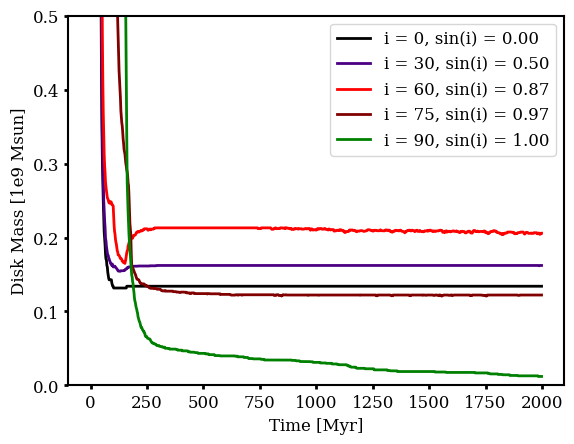

In [21]:
incs = [0, 30, 60, 75, 90]

colors = ["black", "indigo", "red", "maroon", "green"]

for i, container in enumerate(orbit_containers):
    times, evol = grp.Mdisk(container, masses=shadow.masses)
    plt.plot(times, evol / 1e9, color=colors[i], lw=2, 
             label=f"i = {incs[i]}, sin(i) = {np.sin(np.deg2rad(incs[i])):.2f}")
plt.legend()
plt.xlabel("Time [Myr]")
plt.ylabel("Disk Mass [1e9 Msun]")
plt.ylim(0, 0.5)